# Importing libraries

In [1]:
import speech_recognition as sr
from pydub import AudioSegment
from pydub.playback import play
import pyttsx3
from scipy.io.wavfile import write

In [2]:
import torchaudio
from speechbrain.pretrained import Tacotron2
from speechbrain.pretrained import HIFIGAN

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


### Finding the desired microphone

In [6]:
# Get a list of all available microphone names
microphone_names = sr.Microphone.list_microphone_names()
microphones = []
ind=0
# Print the names of the available microphones
print("Available microphones:")
for i, name in enumerate(microphone_names):
    #print(f"{i}: {name}")
    if 'hyperx' in name.lower():
        ind = i
        if "Microphone" in name:
            print("found: ", name, ' at index ', i)
            microphones.append(name)
            break
        
        


Available microphones:
found:  Microphone (HyperX QuadCast S)  at index  1


# Initializing models

In [7]:
# Initialize recognizer class (for recognizing the speech)
r = sr.Recognizer()

# List of activation words
activation_words = ['insight', 'inside', 'sight', "insects"]

In [8]:
# Intialize TTS (tacotron2) and Vocoder (HiFIGAN)
tacotron2 = Tacotron2.from_hparams(source="speechbrain/tts-tacotron2-ljspeech", savedir="tmpdir_tts")
hifi_gan = HIFIGAN.from_hparams(source="speechbrain/tts-hifigan-ljspeech", savedir="tmpdir_vocoder")

# Helper functions

In [9]:
def activeListening(r):
    while True:
        text = speechToText(r)
        for word in activation_words:
            if word in text:
                return "ClearPath is here!"
        return "bot not called!"
    
    

def speechToText(r):
    # Reading Microphone as source
    with sr.Microphone(device_index=ind) as source:
        print("Talk")
        audio = r.listen(source)

    # Using Sphinx to recognize speech in the audio
    try:
        text = r.recognize_sphinx(audio)
        print("You said: " + text)


        # Saving the audio data to a file
        with open("lastaudio.wav", "wb") as f:
            f.write(audio.get_wav_data())

    except sr.UnknownValueError:
        print("Sphinx could not understand audio")
    except sr.RequestError as e:
        print("Sphinx error; {0}".format(e))
        
    return text

def text_to_wav(name):
    # Playing the audio in the browser
    sound = AudioSegment.from_wav(name)
    # Change the sample rate to 44.1kHz
    sound = sound.set_frame_rate(44100)
    sound.export("latestOutput.mp3", format="mp3")
    
    sound = AudioSegment.from_mp3("latestOutput.mp3")
    play(sound)
    
def textToSpeechFromText(text):
    
    engine = pyttsx3.init()
    
    voices = engine.getProperty('voices')
    engine.setProperty('voice', voices[1].id)  # change the voice to the second one in the list
    engine.setProperty('language', 'en-us')  # set the language to US English
    
    #rate = engine.getProperty('rate')
    #engine.setProperty('rate', int(rate * 1.1))
    #engine.setProperty('rate', rate - 50)

    volume = engine.getProperty('volume')
    engine.setProperty('volume', volume + 0.25)

    engine.say(text)
    engine.runAndWait()
    
    # Playing the audio in the browser
    #sound = AudioSegment.from_wav(name)
    #play(sound)
    
def textToSpeechAI(text):
    
    # Running the TTS
    mel_output, mel_length, alignment = tacotron2.encode_text(text)

    # Running Vocoder (spectrogram-to-waveform)
    waveforms = hifi_gan.decode_batch(mel_output)

    # Save the waverform
    write("latestOutput.wav", 23000, waveforms.numpy())
    #torchaudio.save('latestOutput.wav',waveforms.squeeze(1), 22050)
    
    #textToSpeechFromFile('latestOutput.wav')

In [10]:
text_to_wav('latestOutput.wav')

FileNotFoundError: [Errno 2] No such file or directory: 'latestOutput.wav'

In [27]:
textToSpeechFromText("Hello, this is your voice assistant.")

In [38]:
#textToSpeechFromText("Hello, this is an example.")
textToSpeechAI("Hello, this is your voice assistant.")

In [19]:
activeListening(r)

Talk
You said: no i'm sorry


'bot not called!'

In [1]:
import graphviz as gv
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
class VI:
    def __init__(self, previous=None, next=None, screens=[], actions=[], name="Default Layer", identifier=0):
        self.previous = previous
        self.next = next
        self.screens = screens
        self.actions = actions
        self.name = name
        self.id = identifier
        

    def __str__(self):
        connections = self.get_screens() 

        for i in range(len(self.screens)):
            connections += "\n\n \t |\n\n"+ (self.screens[i].get_screens())

        #print(connections)    
        return connections
        
    def navigateTo(self, screen_name):
        if screen_name in self.screens:
            print("Navigating to screen: ", screen_name)
        else:
            print("Screen not found in list of screens")
    
    def set_previous(self, previous):
        self.previous = previous
        
    def get_previous(self):
        return self.previous
    
    def set_next(self, next):
        self.next = next
        
    def get_next(self):
        return self.next
    
    def set_screens(self, screens):
        self.screens = screens
        
    def get_screens(self):
        result = "("+self.get_name()+"): "
        for screen in self.screens:
            
            try:
                result += str(screen.get_name()) + " - "
            except:
                result += str(screen) + " - "
                
        return result[:-2]
    
    def set_name(self, name):
        self.name = name
        
    def get_name(self):
        return self.name
    
    def set_id(self, identifier):
        self.id = identifier
        
    def get_id(self):
        return self.id

    
    def defaultInterface():
        Exit = "Exit"

        Home  = VI(name="Main Layer", identifier=1)
        View1 = VI(previous=Home, next=None, screens=[], name="View1 Layer", identifier=2)
        View1Otherscreen = VI(previous=View1, next=None, screens=[], name="View1 Layer", identifier=2)
        View2 = VI(previous=Home, name="View2 Layer", identifier=3)
        Settings = VI(previous=Home, name="Setting Layer", identifier=4)
        Exit = VI(previous=Home, name="Exit Layer", identifier=5)


        Home.set_screens([View1, View2, Settings, Exit])
        View1.set_screens([Home, View2, Settings, Exit])
        View1Otherscreen.set_screens([Home, View1, Exit])
        View2.set_screens([Home, View1, Settings, Exit])
        Settings.set_screens([Home, View1, View2, Exit])
        Exit.set_screens([])

        return Home
    

        
Home = VI.defaultInterface()
#Home.screens
print(str(Home))

(Main Layer): View1 Layer - View2 Layer - Setting Layer - Exit Layer 

 	 |

(View1 Layer): Main Layer - View2 Layer - Setting Layer - Exit Layer 

 	 |

(View2 Layer): Main Layer - View1 Layer - Setting Layer - Exit Layer 

 	 |

(Setting Layer): Main Layer - View1 Layer - View2 Layer - Exit Layer 

 	 |

(Exit Layer)


here


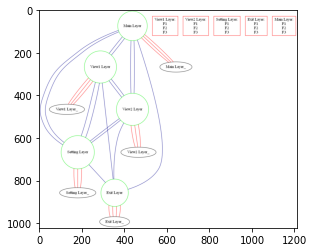

In [3]:
def create_layer_diagram(layers):
    graph = gv.Graph(format='png')
    
    for layer in layers:
        graph.node(layer, shape='circle', color='green2')
        
        for neighbor in layers[layer]:
            try:
                graph.edge(layer, neighbor, color='blue4')
                
                graph.node(neighbor + ":\n"+"F1\nF2\nF3", shape='rectangle', color='red1')
                graph.edge(neighbor, neighbor + "_", shape='rectangle', color='red1')
            except:
                pass
    
    return graph

layers = {
    "Main Layer": ["View1 Layer", "View2 Layer", "Setting Layer", "Exit Layer"],
    "View1 Layer": ["Main Layer", "View2 Layer", "Setting Layer", "Exit Layer"],
    "View2 Layer": ["Main Layer", "View1 Layer", "Setting Layer", "Exit Layer"],
    "Setting Layer": ["Main Layer", "View1 Layer", "View2 Layer", "Exit Layer"],
    "Exit Layer": []
}

diagram = create_layer_diagram(layers)
print("here")
diagram.render('layer_diagram')
img = mpimg.imread('layer_diagram.png')
imgplot = plt.imshow(img)
plt.show()

In [5]:
layer = VI(previous=None, next=None, screens=["Home", "Settings"], name="Main Layer", identifier=1)

layer.set_previous("Previous Layer")
layer.set_next("Next Layer")
layer.set_screens(["Home", "Settings", "Profile"])
layer.set_name("Updated Layer")
layer.set_id(2)

print("Previous: ", layer.get_previous())
print("Next: ", layer.get_next())
print("Screens: ", layer.get_screens())
print("Name: ", layer.get_name())
print("ID: ", layer.get_id())

Previous:  Previous Layer
Next:  Next Layer
Screens:  (Updated Layer): Home - Settings - Profile 
Name:  Updated Layer
ID:  2
